In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bbc_news_dataset.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


In [5]:
#check for misiing value
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [6]:
# separate x and y
x = df['Text']
y = df['Category']

In [7]:
# view the Categories
category_names = y.unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


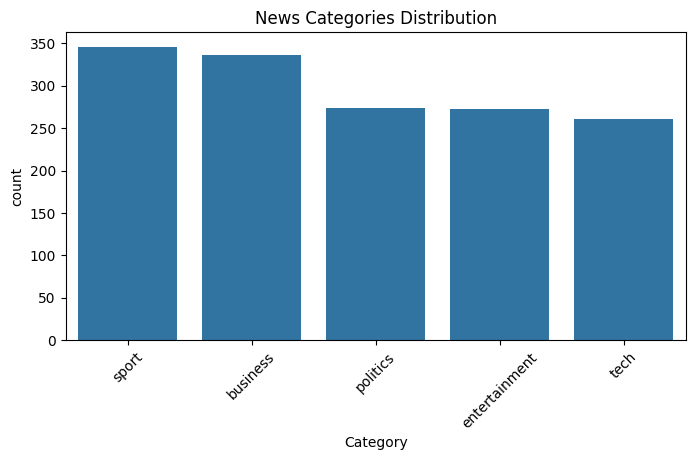

In [9]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Category',order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("News Categories Distribution")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [9]:
model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print(f'Accuracy is {accuracy_score(y_test,y_preds)*100}')
print('\n',classification_report(y_test,y_preds))

Accuracy is 95.63758389261746

                precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



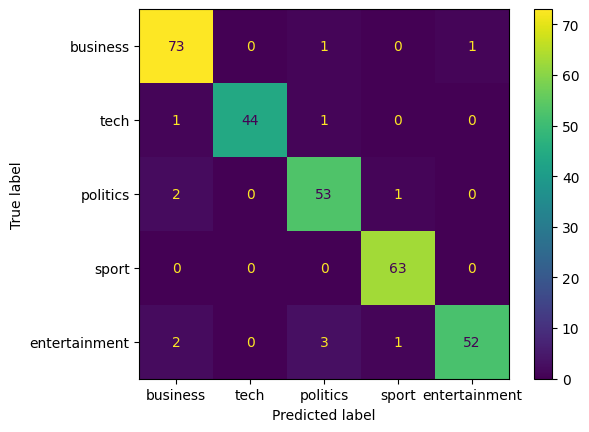

In [10]:
cm = confusion_matrix(y_test,y_preds)
cm_plt = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=category_names)
cm_plt.plot()


In [11]:
# Unseen Data
news = [
    'The largest team of football is manchester united , It has great players',
    'The government decided to give new aid to ukraine for ongoing russia ukraine war , Queen decided to step ahead'
]
news_preds = model.predict(news)
for text , prediction in zip(news , news_preds):
    print(f'Text = {text}\n Predicted Category = {prediction}')

Text = The largest team of football is manchester united , It has great players
 Predicted Category = sport
Text = The government decided to give new aid to ukraine for ongoing russia ukraine war , Queen decided to step ahead
 Predicted Category = business


In [12]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']